### Grey-level transformations

Using python notebook, demonstrate a contrast enhancement algorithm on a low contrast image (an image of your choice) based on your answer depicted in the problem 
1. A. Show side by side the image and its associated histogram of both the original and the transformed images. You may use relevant python libraries such OpenCV and numpy to quickly implement your program. Please use markdown cells to put your explanation/comments on each code segment.

### Step 1 : Import Library, Open Image File and Convert to Gray Image

Membuka gambar dan melakukan konversi gambar ke gambar gray.

In [1]:
# Import library yang dibutuhkan
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("img.jpg") # Baca Image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Konversi image menjadi abu abu

cv2.imshow("Original", img)
# Tampilkan gambar original yang sudah terkonversi.
cv2.waitKey(0)
cv2.destroyAllWindows()



### Step 2 : Draw the histogram of current gray image using Matplotlib

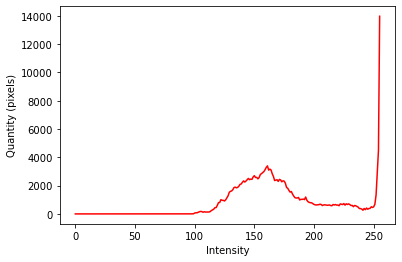

In [2]:
# Mengambil size width dan height dari gambar 
img_height = img.shape[0]
img_width = img.shape[1]

# Membuat array kosong untuk menyimpan level frekuensi intensitas gambar
img_intensity_counter = np.zeros(256, dtype = int)

# Untuk keperluan plot histogram : Menghitung setiap level intensitas dari gambar baru dan memasukkannya ke dalam array.
for i in range(img_height) :
    for j in range(img_width) :
        img_intensity_counter[img[i][j]] += 1
        
# Plot the histogram of the intensity
plt.figure(1)
plt.plot(img_intensity_counter, color = 'r')
plt.ylabel('Quantity (pixels)')
plt.xlabel('Intensity')
plt.show()

### Step 3 : Perform the Gray-Level Slicing

Gray Level Slicing digunakan untuk melakukan highlighting pada gambar. <br>
Ada 2 approach yang dapat digunakan sesuai dengan nomor 1A, berikut adalah approachnya

First Approach <br>
Memberikan nilai tinggi untuk gray scale pada selang yang diinginkan dan nilai rendah pada level gray yang lain.

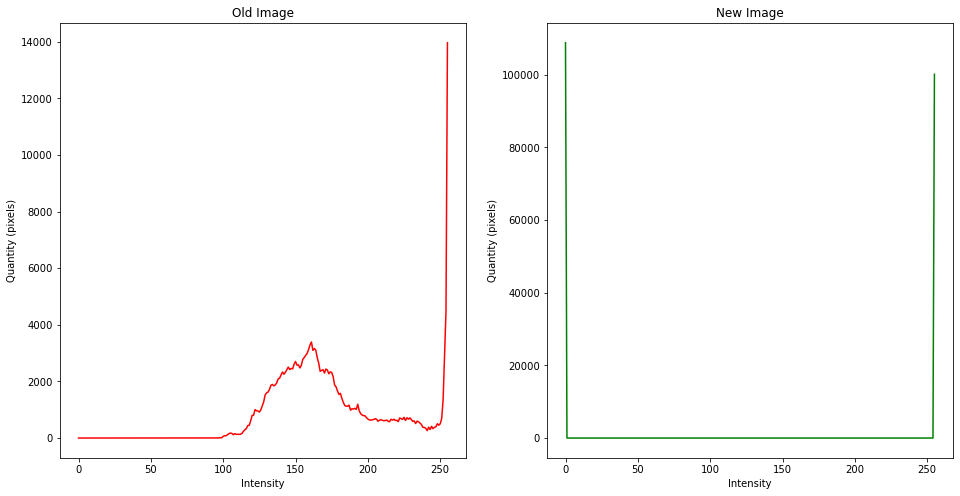

In [3]:
WHITE_SCALE = 255 # Konstanta untuk warna putih poda gray scale
BLACK_SCALE = 0 # Konstanta untuk warna hitam poda gray scale
A,B = 150, 200 # Menetapkan nilai r yang ingin dihighlight. Dipilih interval [A,B] = [150, 200]

# Melakukan baca ulang pada gambar original untuk transformasi gambar yang baru.
new_img_first = cv2.imread("img.jpg", 2)
# Membuat array kosong untuk menyimpan level frekuensi intensitas gambar
new_img_first_intensity_counter = np.zeros(256, dtype=int)

# Melakukan Gray Level Slicing, semua pixel yang memiliki gray scale di antara A dan B akan diberi warna putih, selain itu diberikan warna hitam.
for i in range(img_height) :
    for j in range(img_width) : 
        if img[i][j] >= A and img[i][j] <= B : # Jika r berada pada interval A dan B 
            new_img_first[i][j] = WHITE_SCALE # Mengubah intensitas menjadi warna putih 
        else : # Selain di selang r
            new_img_first[i][j] = BLACK_SCALE  # Mengubah intensitas menjadi warna hitam

# Untuk keperluan plot histogram : Menghitung setiap level intensitas dari gambar baru dan memasukkannya ke dalam array.
for i in range(img_height) :
    for j in range(img_width) : 
        new_img_first_intensity_counter[new_img_first[i][j]] += 1

# Plotting histogram gray scale
plt.figure(1, (16, 8))

# Original Plot
plt.subplot(1, 2, 1)
plt.title("Old Image")
plt.plot(img_intensity_counter, color = 'r')
plt.ylabel('Quantity (pixels)')
plt.xlabel('Intensity')

# Tranformed Plot
plt.subplot(1, 2, 2)
plt.title("New Image")
plt.plot(new_img_first_intensity_counter, color = 'g')
plt.ylabel('Quantity (pixels)')
plt.xlabel('Intensity')
plt.show()

# Menampilkan gambar yang sudah dilakukan transformasi.
result = np.hstack((img, new_img_first)) # Stack gambar original dan gambar baru agar ditampilkan dalam 1 view yang sama
cv2.imshow("Result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

Second Approach <br>
Memberikan nilai tinggi untuk gray scale pada selang yang diinginkan dan mempertahankan nilai untuk gray scale yang lain.

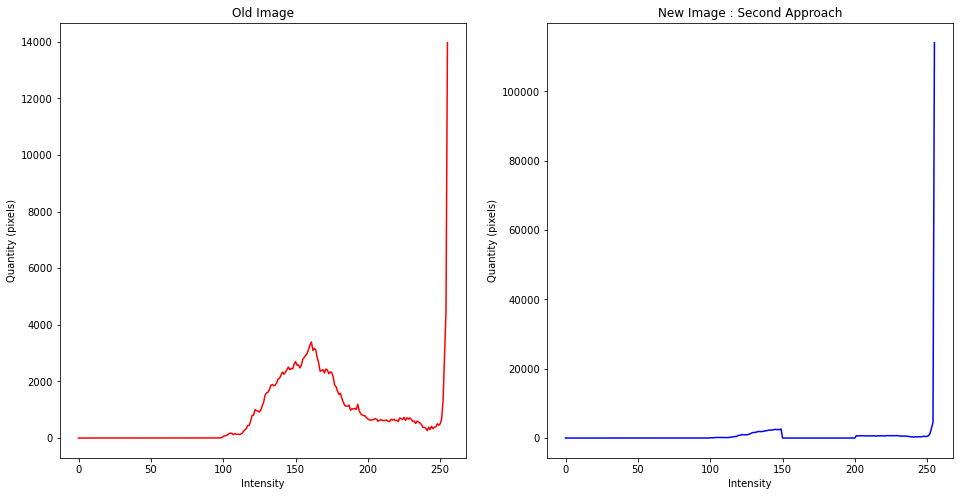

In [4]:
# Melakukan baca ulang pada gambar original untuk transformasi gambar yang baru.
new_img_second = cv2.imread("img.jpg", 2)
# Membuat array kosong untuk menyimpan level frekuensi intensitas gambar
new_img_second_intensity_counter = np.zeros(256, dtype=int)

# Melakukan Gray Level Slicing, semua pixel yang memiliki gray scale di antara A dan B akan diberi warna putih, selain itu nilai gray scale lama tetap dipertahankan.
for i in range(img_height) :
    for j in range(img_width) : 
        if img[i][j] >= A and img[i][j] <= B :  # Jika r berada pada interval A dan B 
            new_img_second[i][j] = WHITE_SCALE # Mengubah intensitas menjadi warna putih 
        else : # Selain pada interval A dan B
            new_img_second[i][j] = img[i][j]  # Mempertahankan gray scale lama. (Menggunakan nilai pada array gambar original)
            

# Untuk keperluan plot histogram : Menghitung setiap level intensitas dari gambar baru dan memasukkannya ke dalam array.
for i in range(img_height) :
    for j in range(img_width) : 
        new_img_second_intensity_counter[new_img_second[i][j]] += 1

# Plotting histogram gray scale
plt.figure(1, (16, 8))

# Original Plot
plt.subplot(1, 2, 1)
plt.title("Old Image")
plt.plot(img_intensity_counter, color = 'r')
plt.ylabel('Quantity (pixels)')
plt.xlabel('Intensity')

# Transformed Plot
plt.subplot(1, 2, 2)
plt.title("New Image : Second Approach")
plt.plot(new_img_second_intensity_counter, color = 'b')
plt.ylabel('Quantity (pixels)')
plt.xlabel('Intensity')
plt.show()

# Menampilkan gambar yang sudah dilakukan transformasi.
result = np.hstack((img, new_img_second)) # Stack gambar original dan gambar baru agar ditampilkan dalam 1 view yang sama
cv2.imshow("Result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Step 4 : Increase the Constrast by Histogram Equalization

Membuat histogram dari gray scale menjadi uniform dengan metode Histogram Equalization. Untuk melakukan Histogram Equalization dapat menggunakan function dari cv2

In [5]:
equalized_img = cv2.equalizeHist(img) # Melakukan Histogram equalization dengan function cv2
equalized_img_intensity_counter = np.zeros(256, dtype = int) # Membuat array intensity counter untuk gambar yang sudah dialkukan histogram equalization

# Untuk keperluan plot histogram : Menghitung setiap level intensitas dari gambar baru dan memasukkannya ke dalam array.
for i in range(img_height) : 
    for j in range(img_width) : 
        equalized_img_intensity_counter[equalized_img[i][j]] += 1

# Plot the histogram
plt.figure(1, (16, 8))
plt.subplot(1, 2, 1) # subplot(baris, kolom, plot)
plt.plot(img_intensity_counter, 'g', label = "Before")
plt.title("Original Image")
plt.legend(loc='upper left')
plt.ylabel('Quantity')
plt.xlabel('Intensity')

plt.subplot(1, 2, 2)
plt.plot(equalized_img_intensity_counter, 'r', label = "After")
plt.title("Equalized Image")
plt.legend(loc='upper left')
plt.ylabel('Quantity')
plt.xlabel('Intensity')

# Menampilkan gambar yang sudah ditingkatkan kontrasnya dengan histogram equalization.
res = np.hstack((img, equalized_img)) 
cv2.imshow("Result of Equalized Image", res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Step 5 : Combine all the pictures

In [ ]:
result_gray_slicing = np.hstack((img, new_img_first ,new_img_second)) # Stack gambar original dan gambar baru agar ditampilkan dalam 1 view yang sama
cv2.imshow("Result of Gray Slicing Highlighting", result_gray_slicing)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Stack gambar original dengan gambar yang sudah ditingkatkan kontrasnya..
result_equalized_img = np.hstack((img, equalized_img))
cv2.imshow("Result of Increased Contrast by Histogram Equalization", result_equalized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(1, (25,8))

# Original
plt.subplot(1, 4, 1)
plt.title("Original")
plt.plot(img_intensity_counter, color = 'r')
plt.ylabel('Quantity (pixels)')
plt.xlabel('Intensity')

# First Approach Plot
plt.subplot(1, 4, 2)
plt.title("New Image : First Approach")
plt.plot(new_img_first_intensity_counter, color = 'g')
plt.ylabel('Quantity (pixels)')
plt.xlabel('Intensity')

# Second Approach Plot
plt.subplot(1, 4, 3)
plt.title("New Image : Second Approach") 
plt.plot(new_img_second_intensity_counter, color = 'b')
plt.ylabel('Quantity (pixels)')
plt.xlabel('Intensity')


# Equalized Histogram
plt.subplot(1, 4, 4)
plt.title("Equalized Image") 
plt.plot(equalized_img_intensity_counter, color = 'r')
plt.ylabel('Quantity (pixels)')
plt.xlabel('Intensity')
plt.show()

### Sources

https://www.philadelphia.edu.jo/academics/hhardan/uploads/Image_Processing-ch3_part_3.pdf